In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
# city_data_to_load = "data/city_data.csv"
# ride_data_to_load = "data/ride_data.csv"

city_ride_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")
city_ride_df.head()
ride_df.head()

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [2]:
ride_df.describe()

,fare,ride_id
count,2375.000000,2.375000e+03
mean,26.753112,4.887270e+12
std,12.109465,2.907361e+12
min,4.050000,3.218337e+08
25%,17.190000,2.381175e+12
50%,26.600000,4.748541e+12
75%,36.645000,7.461936e+12
max,58.550000,9.991538e+12


In [3]:
ride_df = ride_df.dropna(how="any")
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [4]:
df_ride = (ride_df[["city", "fare"]].groupby(['city'])
               .agg({
                   'fare': ['count', 'mean','sum']
        
                           }))

In [5]:
Ride_table = pd.merge(df_ride, city_ride_df, how='left', left_on="city", right_on="city" )
Ride_table 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,city,"(fare, count)","(fare, mean)","(fare, sum)",driver_count,type
0,Amandaburgh,18,24.641667,443.55,12,Urban
1,Barajasview,22,25.332273,557.31,26,Urban
2,Barronchester,16,36.422500,582.76,11,Suburban
3,Bethanyland,18,32.956111,593.21,22,Suburban
4,Bradshawfurt,10,40.064000,400.64,7,Rural
5,Brandonfort,19,35.437368,673.31,10,Suburban
6,Carriemouth,27,28.314444,764.49,52,Urban
7,Christopherfurt,27,24.501852,661.55,41,Urban
8,Colemanland,22,30.894545,679.68,23,Suburban
9,Davidfurt,17,31.995882,543.93,23,Suburban


## Bubble Plot of Ride Sharing Data

In [6]:
Ride_table.columns = ['City','Ride', 'Average_Fare', 'Total_Fare', 'Driver_Count', 'City_Type']


In [7]:
y = Ride_table['Driver_Count']

In [8]:
Urban =  Ride_table['City_Type']=='Urban'
Urban_data = Ride_table[Urban]
Suburban =  Ride_table['City_Type']=='Suburban'
Suburban_data = Ride_table[Suburban]
Rural =  Ride_table['City_Type']=='Rural'
Rural_data = Ride_table[Rural]


In [9]:
a =  Urban_data['Average_Fare']
b =  Urban_data['Ride']
x =  Urban_data['Total_Fare'] 
c =  Suburban_data['Average_Fare']
d =  Suburban_data['Ride']
y =  Suburban_data['Total_Fare']
e =  Rural_data['Average_Fare']
f =  Rural_data['Ride']
z =  Rural_data['Total_Fare']

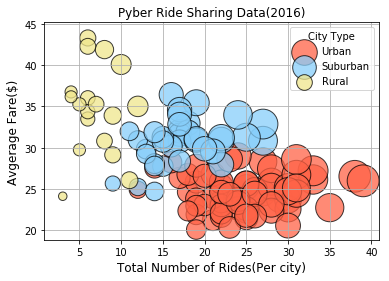

In [10]:
plt.scatter(b, a, label = "Urban", c = "tomato", marker="o", s=x, edgecolors="black", alpha=0.75, linewidths=1)
plt.scatter(d, c, label = "Suburban", c = "lightskyblue", marker="o", s=y, edgecolors="black", alpha=0.75, linewidths=1)
plt.scatter(f, e, label = "Rural", c = "khaki", marker="o", s=z, edgecolors="black", alpha=0.75, linewidths=1)

plt.grid()
plt.xlabel("Total Number of Rides(Per city)", fontsize = 12)
plt.ylabel("Avgerage Fare($)", fontsize = 12)
plt.title("Pyber Ride Sharing Data(2016)", fontsize = 12)
plt.legend(title='City Type', fontsize = 10)
plt.show()

In [11]:
df_fare =  Ride_table[["City_Type", "Total_Fare"]]
df_fare_data = df_fare.groupby(["City_Type"]).sum()
df_fare_pie =  df_fare_data.reset_index()

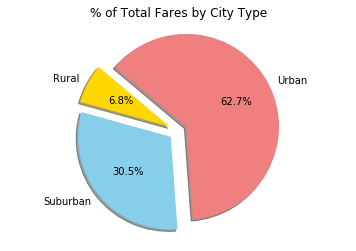

In [12]:
labels = df_fare_pie['City_Type'] 

# The values of each section of the pie chart
sizes = df_fare_pie['Total_Fare'] 

# The colors of each section of the pie chart
colors = ["Gold", "SkyBlue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0.1, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.savefig("data/Fare_Percent.png")
plt.show()


In [13]:
df_Ride =  Ride_table[["City_Type", "Ride"]]
df_Ride_data = df_Ride.groupby(["City_Type"]).sum()
df_Ride_pie =  df_Ride_data.reset_index()

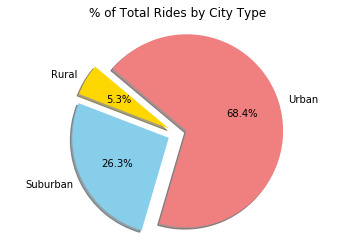

In [14]:
labels = df_Ride_pie['City_Type'] 

# The values of each section of the pie chart
sizes = df_Ride_pie['Ride'] 

# The colors of each section of the pie chart
colors = ["Gold", "SkyBlue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.savefig("data/Ride_Percent.png")
plt.show()

In [15]:
df_Drivers =  Ride_table[["City_Type", "Driver_Count"]]
df_Drivers_data = df_Drivers.groupby(["City_Type"]).sum()
df_Drivers_pie =  df_Drivers_data.reset_index()

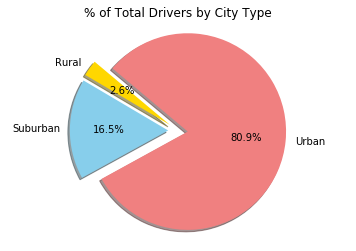

In [16]:
labels = df_Drivers_pie['City_Type'] 

# The values of each section of the pie chart
sizes = df_Drivers_pie['Driver_Count'] 

# The colors of each section of the pie chart
colors = ["Gold", "SkyBlue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.savefig("data/Drive_Percent.png")
plt.show()